# <font color='red'> Fraudulent Firm Prediction - Regression
    
### Author: Ankit Raina
### Date of Creation: April 15, 2019

### Importing required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data sets

In [4]:
audit_risk_data = pd.read_csv('audit_risk.csv')
trial_data = pd.read_csv('trial.csv')

### Merging the two datasets

In [5]:
# Not considering duplicate columns in trial_data when merging
common_columns = audit_risk_data.columns.intersection(trial_data.columns).tolist()
merged_audit_risk_data = pd.merge(audit_risk_data, trial_data, how = 'inner', left_on=common_columns, right_on=common_columns)

In [6]:
merged_audit_risk_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1.7148,1,6,2,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5108,0,2,2,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.3096,0,2,2,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,3.5060,1,2,6,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2832,0,2,2,2,2,2,0,2,2


### Checking if there is any null value

In [7]:
merged_audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      629 non-null float64
LOCATION_ID       629 non-null object
PARA_A            629 non-null float64
Score_A           629 non-null float64
Risk_A            629 non-null float64
PARA_B            629 non-null float64
Score_B           629 non-null float64
Risk_B            629 non-null float64
TOTAL             629 non-null float64
numbers           629 non-null float64
Score_B.1         629 non-null float64
Risk_C            629 non-null float64
Money_Value       628 non-null float64
Score_MV          629 non-null float64
Risk_D            629 non-null float64
District_Loss     629 non-null int64
PROB              629 non-null float64
RiSk_E            629 non-null float64
History           629 non-null int64
Prob              629 non-null float64
Risk_F            629 non-null float64
Score             629 non-null float64
Inherent_Risk     629 non-null float64
CON

##### After performing the merge on common columns, we see that only 629 observations out of the 776 observations could be matched in both the datasets.
##### We can see that there is one observation for which Money_Value is null, which we'll mark as NaN

##### As we can see that Location_ID is the only categorical variable (object), which is coded as an integer, but there is probability that some of the values may not be numeric, we'll check for such values and mark them as NaN

In [8]:
merged_audit_risk_data = merged_audit_risk_data.replace(r'[^\d.]+',np.nan,regex=True)
merged_audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      629 non-null float64
LOCATION_ID       626 non-null object
PARA_A            629 non-null float64
Score_A           629 non-null float64
Risk_A            629 non-null float64
PARA_B            629 non-null float64
Score_B           629 non-null float64
Risk_B            629 non-null float64
TOTAL             629 non-null float64
numbers           629 non-null float64
Score_B.1         629 non-null float64
Risk_C            629 non-null float64
Money_Value       628 non-null float64
Score_MV          629 non-null float64
Risk_D            629 non-null float64
District_Loss     629 non-null int64
PROB              629 non-null float64
RiSk_E            629 non-null float64
History           629 non-null int64
Prob              629 non-null float64
Risk_F            629 non-null float64
Score             629 non-null float64
Inherent_Risk     629 non-null float64
CON

In [9]:
merged_audit_risk_data.isna().any()

Sector_score      False
LOCATION_ID        True
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
SCORE_A           False
SCORE_B           False
Marks             False
MONEY_Marks       False
District          False
Loss              False
LOSS_SCORE        False
History_score     False
dtype: bool

In [10]:
merged_audit_risk_data.isna().sum()

Sector_score      0
LOCATION_ID       3
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
SCORE_A           0
SCORE_B           0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
dtype: int64

In [11]:
merged_audit_risk_data = merged_audit_risk_data.dropna()

In [12]:
merged_audit_risk_data.info()
merged_audit_risk_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      625 non-null float64
LOCATION_ID       625 non-null object
PARA_A            625 non-null float64
Score_A           625 non-null float64
Risk_A            625 non-null float64
PARA_B            625 non-null float64
Score_B           625 non-null float64
Risk_B            625 non-null float64
TOTAL             625 non-null float64
numbers           625 non-null float64
Score_B.1         625 non-null float64
Risk_C            625 non-null float64
Money_Value       625 non-null float64
Score_MV          625 non-null float64
Risk_D            625 non-null float64
District_Loss     625 non-null int64
PROB              625 non-null float64
RiSk_E            625 non-null float64
History           625 non-null int64
Prob              625 non-null float64
Risk_F            625 non-null float64
Score             625 non-null float64
Inherent_Risk     625 non-null float64
CON

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,...,625.000000,625.000000,625.000000,625.000000,625.00000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,21.458752,2.638337,0.339200,1.490003,13.189666,0.320640,7.767216,15.788643,5.082400,0.228800,...,8.747667,0.491200,3.392000,3.206400,2.28800,3.110400,2.560000,0.033600,2.070400,2.204800
std,24.583572,6.295894,0.180853,3.805486,55.547565,0.176794,33.354451,56.883767,0.291455,0.088085,...,42.943459,0.500323,1.808527,1.767937,0.88085,1.710349,1.330124,0.197315,0.402123,0.748701
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.280000,0.000000,2.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.720000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.210000,5.000000,0.200000,...,0.299200,0.000000,2.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.650000,0.200000,0.130000,0.430000,0.200000,0.086000,1.050000,5.000000,0.200000,...,0.444800,0.000000,2.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.920000,0.600000,1.752000,6.720000,0.600000,3.448000,11.120000,5.000000,0.200000,...,4.971600,1.000000,6.000000,6.000000,2.00000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,961.514400,1.000000,6.000000,6.000000,6.00000,6.000000,6.000000,2.000000,6.000000,6.000000


## Regression

### Feature Selection

c:\softwares\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


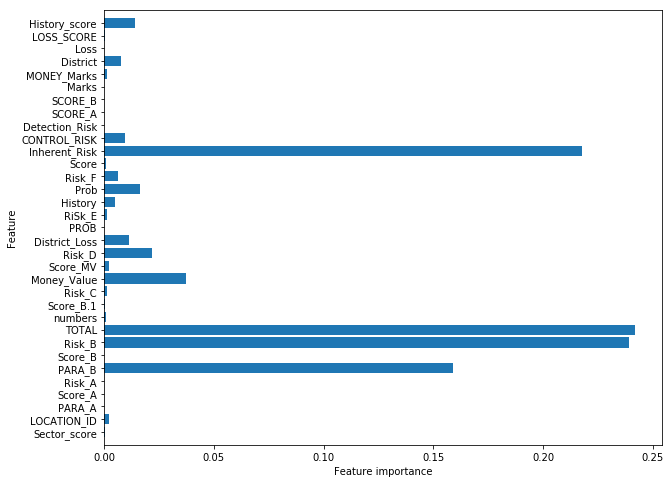

In [13]:
X = merged_audit_risk_data.loc[:, ~merged_audit_risk_data.columns.isin(['Audit_Risk', 'Risk'])]
y = merged_audit_risk_data.loc[:, merged_audit_risk_data.columns.isin(['Audit_Risk', 'Risk'])]

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(random_state=0)
model.fit(X, y['Audit_Risk'])

%matplotlib inline
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)

### Checking for correlation

In [14]:
corr_matrix = merged_audit_risk_data.corr().abs()
high_corr_var = np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('PARA_A', 'Risk_A'),
 ('Score_A', 'SCORE_A'),
 ('PARA_B', 'Risk_B'),
 ('PARA_B', 'TOTAL'),
 ('Score_B', 'Score'),
 ('Score_B', 'SCORE_B'),
 ('Risk_B', 'TOTAL'),
 ('numbers', 'Score_B.1'),
 ('numbers', 'Risk_C'),
 ('numbers', 'Marks'),
 ('Score_B.1', 'Risk_C'),
 ('Score_B.1', 'Marks'),
 ('Risk_C', 'Marks'),
 ('Money_Value', 'Risk_D'),
 ('Score_MV', 'MONEY_Marks'),
 ('District_Loss', 'RiSk_E'),
 ('District_Loss', 'District'),
 ('PROB', 'Loss'),
 ('PROB', 'LOSS_SCORE'),
 ('RiSk_E', 'District'),
 ('History', 'Risk_F'),
 ('Prob', 'History_score'),
 ('Score', 'SCORE_B'),
 ('Loss', 'LOSS_SCORE')]

Now, from the above features with the most importance, we had computed  
1. Total, PARA_B and Risk_B are more than 90% correlated
2. Inherent_Risk, Risk_D and Money_Value are more than 90% correlated
3. Prob and History_Score are more than 90% correlated

We therefore,
Drop PARA_B and Risk_B in favor of Total
Drop Risk_D and Money_Value in favor of Inherent_Risk
Drop History_Score and Money_Value in favor of Prob

Final Features to be used for regression are as under:
TOTAL, Inherent_Risk, Prob, District_Loss, Score, CONTROL_RISK, Score_MV

In [15]:
features_for_regression = ['TOTAL','Inherent_Risk', 'Prob', 'Score', 'CONTROL_RISK', 'District_Loss', 'Score_MV']
X = X.loc[:, features_for_regression]

### Outlier Detection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029BEDCFC5C0>,
      dtype=object)

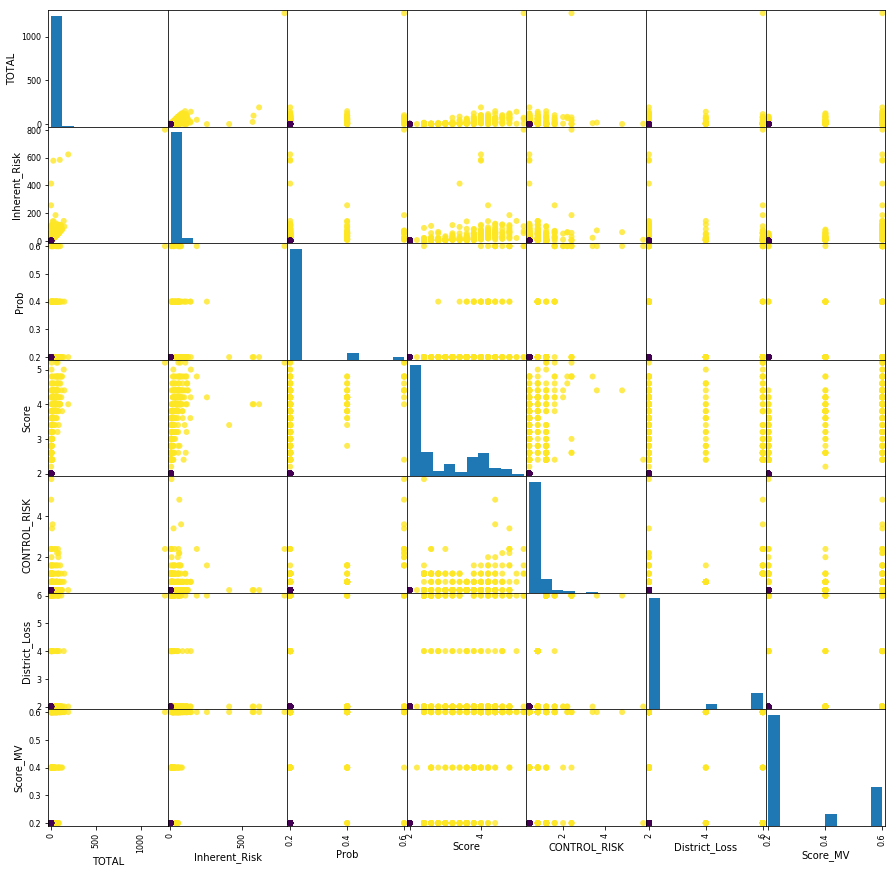

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, figsize = (15,15), c = y['Risk'], alpha = 0.8, marker = 'O')

{'whiskers': [<matplotlib.lines.Line2D at 0x29beec114a8>,
 'caps': [<matplotlib.lines.Line2D at 0x29beec11b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x29beec11358>,
 'medians': [<matplotlib.lines.Line2D at 0x29beec1b208>,
 'fliers': [<matplotlib.lines.Line2D at 0x29beec1b550>,
 'means': []}

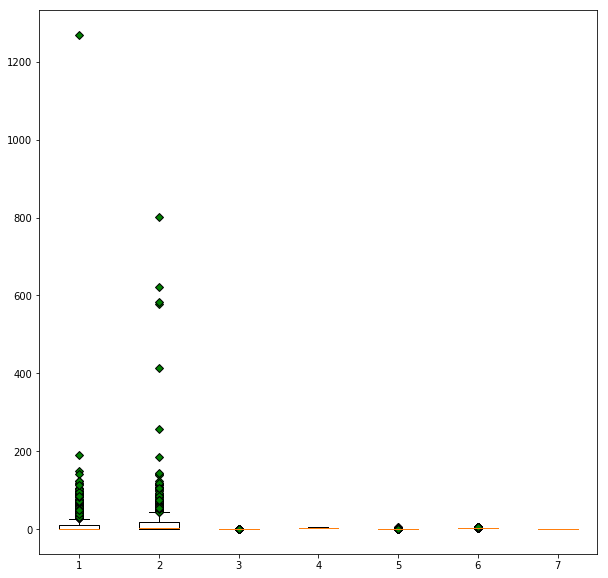

In [17]:
green_diamond = dict(markerfacecolor='g', marker='D')

fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.boxplot(X.values, flierprops=green_diamond)

In [18]:
from scipy import stats
data_outliers_removed = merged_audit_risk_data[(np.abs(stats.zscore(merged_audit_risk_data.loc[:, features_for_regression])) < 3).all(axis=1)]

X = data_outliers_removed.loc[:, features_for_regression]
y = data_outliers_removed.loc[:, ['Audit_Risk', 'Risk']]

### Splitting the data into training-validation and test data sets 

In [19]:
from sklearn.model_selection import train_test_split

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

# We have two output variables Audit_Risk and Risk
# Assessing Audit_Risk is a regression problem whereas assessing Risk is a binary classification problem
y_reg_trainval = y_trainval['Audit_Risk']
y_reg_test = y_test['Audit_Risk']

y_cls_trainval = y_trainval['Risk'].astype(np.int64)
y_cls_test = y_test['Risk'].astype(np.int64)

### Scaling the training-validation and test data sets using Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_trainval = scaler.fit_transform(X_trainval_org)
X_test = scaler.fit_transform(X_test_org)

c:\softwares\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\softwares\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\softwares\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\softwares\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Stratified 5-folds Cross-Validation 
We will be using Stratified 5-folds Cross-Validation such that each of our test fold will have 20 % of the data 

In [21]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

### Evaluation Strategy
##### For regression, we will assess the model based on how well it is able to explain the variance in the output variable from the input set, therefore, we will use R2 score for this, wherein the model with the best R2 score will be the best.
##### Also, the difference between the actual value and the predicted value of the output variable should be minimum, therefore we will use MSE (Minimum Squared Error), wherein the model with the least MSE or the highest Negative MSE will be the best. 

### Ridge Regression with Bagging

In [21]:
from  sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(Ridge(random_state = 0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

print("Best parameters for Bagging Regressor: {}".format(grid_search.best_params_))

Best parameters for Bagging Regressor: {'alpha': 10}


#### Training Bagging Ridge Regression using best parameter alpha = 10

In [22]:
from sklearn.ensemble import BaggingRegressor

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_estimators': [50, 150, 200, 250, 300, 350, 400, 450, 500],
             'max_samples': [0.5, 0.7, 0.9, 1.0]}

grid_search = GridSearchCV(BaggingRegressor(Ridge(random_state=0, alpha = 10), bootstrap=True, random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)


print("Best parameters for Bagging Regressor: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

Best parameters for Bagging Regressor: {'max_samples': 1.0, 'n_estimators': 200}
Best Mean Train MSE: -10.6995
Best Mean Train R2: 0.8799
Best Mean Validation MSE: -11.9914
Best Mean Validation R2: 0.8650


In [23]:
# Modelling test data with Ridge Regression with bagging using the best parameters
model = BaggingRegressor(Ridge(random_state=0, alpha = 10), bootstrap=True, random_state=0, n_estimators = 200, max_samples = 1.0)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8743
Test MSE: 10.2229


### Support Vector Regression with RBF Kernel with Bagging

In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'C' : [0.01, 0.1, 1, 10], 
              'gamma' : [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(SVR(kernel ='rbf'), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

print("Best parameters for SVR with RBF Kernel: {}".format(grid_search.best_params_))

Best parameters for SVR with RBF Kernel: {'C': 10, 'gamma': 0.1}


#### Training Bagging SVR Regression with RBF Kernel using best parameters C = 10, gamma = 0.1

In [29]:
from sklearn.ensemble import BaggingRegressor

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_estimators': [50, 150, 200, 250, 300, 350, 400, 450, 500],
             'max_samples': [0.5, 0.7, 0.9, 1.0]}

grid_search = GridSearchCV(BaggingRegressor(SVR(kernel = 'rbf', C = 10, gamma = 0.1), bootstrap=True, random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)


print("Best parameters for Bagging Regressor: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

Best parameters for Bagging Regressor: {'max_samples': 1.0, 'n_estimators': 50}
Best Mean Train MSE: -7.2932
Best Mean Train R2: 0.9183
Best Mean Validation MSE: -13.0071
Best Mean Validation R2: 0.8742


In [30]:
# Modelling test data with Support Vector RBF Regressor with bagging with the best parameters
model = BaggingRegressor(SVR(kernel = 'rbf', C = 10, gamma = 0.1), bootstrap=True, random_state=0, n_estimators = 50, max_samples = 1.0)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.9293
Test MSE: 5.7497


### Linear Regression (Ordinary Least Squares) with Pasting

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'max_samples': [0.5, 0.7, 0.9, 1.0]}

grid_search = GridSearchCV(BaggingRegressor(LinearRegression(), bootstrap=False, random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)


print("Best parameters for Pasting Regressor: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

Best parameters for Pasting Regressor: {'max_samples': 0.9, 'n_estimators': 20}
Best Mean Train MSE: -10.3288
Best Mean Train R2: 0.8840
Best Mean Validation MSE: -11.8817
Best Mean Validation R2: 0.8631


In [33]:
# Modelling test data with Linear Regressor with pasting with the best parameters
model = BaggingRegressor(LinearRegression(), bootstrap=False, random_state=0, n_estimators = 20, max_samples = 0.9)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8626
Test MSE: 11.1716


### K Nearest Neighbors with Pasting

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_neighbors': range(1, 20)}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

print("Best parameters for K Nearest Neighbors: {}".format(grid_search.best_params_))

Best parameters for K Nearest Neighbors: {'n_neighbors': 1}


#### We can see that we get the best performance when K = 1 
#### Training K Nearest Neigbors Regressor (K = 1) with Pasting

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_estimators': range(10, 50),
             'max_samples': [0.5, 0.7, 0.9, 1.0]}

grid_search = GridSearchCV(BaggingRegressor(KNeighborsRegressor(n_neighbors = 1), bootstrap=False, random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)


print("Best parameters for Pasting Regressor: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

Best parameters for Pasting Regressor: {'max_samples': 0.7, 'n_estimators': 30}
Best Mean Train MSE: -1.6830
Best Mean Train R2: 0.9813
Best Mean Validation MSE: -13.5024
Best Mean Validation R2: 0.8542


In [37]:
# Modelling test data on the best knn model with pasting using the best parameters
model = BaggingRegressor(KNeighborsRegressor(n_neighbors = 1), bootstrap=False, random_state=0, n_estimators = 30, max_samples = 0.7)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8912
Test MSE: 8.8482


### Lasso Regression with Adaboost Boosting

In [38]:
from  sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(Lasso(random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

print("Best parameters for Lasso Regressor: {}".format(grid_search.best_params_))

Best parameters for Lasso Regressor: {'alpha': 0.1}


#### We now apply Adaboost boosting on Lasso Regressor with alpha = 0.1

In [39]:
from sklearn.ensemble import AdaBoostRegressor

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_estimators': range(10, 50),
             'learning_rate': [0.5, 1, 10, 20, 50],
             'loss': ['linear', 'square', 'exponential']}

grid_search = GridSearchCV(AdaBoostRegressor(Lasso(random_state=0, alpha = 0.1), random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)


print("Best parameters for Adaboost Boosting Regressor: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

Best parameters for Adaboost Boosting Regressor: {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 10}
Best Mean Train MSE: -12.1013
Best Mean Train R2: 0.8642
Best Mean Validation MSE: -13.5759
Best Mean Validation R2: 0.8397


In [40]:
# Modelling test data using Lasso with Adaboost Boosting with the best parameters
model = AdaBoostRegressor(Lasso(random_state=0, alpha = 0.1), learning_rate = 0.5, loss = 'linear', n_estimators = 10, random_state=0)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8417
Test MSE: 12.8773


### Linear Support Vector Machine with Adaboost Boosting

In [41]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'C' : [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LinearSVR(max_iter = 100000, random_state = 0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

print("Best parameters for Linear Support Vector Machine: {}".format(grid_search.best_params_))

Best parameters for Linear Support Vector Machine: {'C': 1}


#### We now apply Adaboost boosting on Linear Support Vector Machine with C = 1

In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_estimators': range(10, 50),
             'learning_rate': [0.5, 1, 10, 20, 50],
             'loss': ['linear', 'square', 'exponential']}

grid_search = GridSearchCV(AdaBoostRegressor(LinearSVR(max_iter = 100000, random_state = 0, C = 1), random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)


print("Best parameters for Adaboost Boosting Regressor: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

Best parameters for Adaboost Boosting Regressor: {'learning_rate': 1, 'loss': 'square', 'n_estimators': 13}
Best Mean Train MSE: -4.9529
Best Mean Train R2: 0.9448
Best Mean Validation MSE: -8.0224
Best Mean Validation R2: 0.9026


In [43]:
# Modelling test data using Linear Support Vector Regressor with Adaboost Boosting with the best parameters
model = AdaBoostRegressor(LinearSVR(max_iter = 100000, random_state = 0, C = 1), random_state=0, learning_rate=1, loss='square', n_estimators=13)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.9600
Test MSE: 3.2492


### Gradient Boosting Regressor

In [58]:
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_estimators': range(30, 100),
             'learning_rate': [0.5, 1, 10, 20, 50],
             'loss': ['ls', 'lad', 'huber', 'quantile']}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
c:\softwares\python\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
c:\softwares\python\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, ke

c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:456: RuntimeWarning: overflow encountered in square
  np.sum(sample_weight * ((y - pred.ravel()) ** 2.0)))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow en

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:456: RuntimeWarning: overflow encountered in square
  np.sum(sample_weight * ((y - pred.ravel()) ** 2.0)))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow enco

c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:456: RuntimeWarning: overflow encountered in square
  np.sum(sample_weight * ((y - pred.ravel()) ** 2.0)))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow en

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:456: RuntimeWarning: overflow encountered in square
  np.sum(sample_weight * ((y - pred.ravel()) ** 2.0)))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow enco

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:456: RuntimeWarning: overflow encountered in square
  np.sum(sample_weight * ((y - pred.ravel()) ** 2.0)))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow enco

c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow 

c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow 

c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow 

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:622: RuntimeWarning: overflow encountered in multiply
  (np.abs(diff[~gamma_mask]) - gamma / 2.0))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduc

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:622: RuntimeWarning: overflow encountered in multiply
  (np.abs(diff[~gamma_mask]) - gamma / 2.0))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered 

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:620: RuntimeWarning: overflow encountered in square
  sq_loss = np.sum(0.5 * sample_weight[gamma_mask] * diff[gamma_mask] ** 2.0)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:622: RuntimeWarning: overflow encountered in multiply
  (np.abs(diff[~gamma_mask]) - gamma / 2.0))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarn

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:620: RuntimeWarning: overflow encountered in square
  sq_loss = np.sum(0.5 * sample_weight[gamma_mask] * diff[gamma_mask] ** 2.0)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:622: RuntimeWarning: overflow encountered in multiply
  (np.abs(diff[~gamma_mask]) - gamma / 2.0))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarn

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:620: RuntimeWarning: overflow encountered in square
  sq_loss = np.sum(0.5 * sample_weight[gamma_mask] * diff[gamma_mask] ** 2.0)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:622: RuntimeWarning: overflow encountered in multiply
  (np.abs(diff[~gamma_mask]) - gamma / 2.0))
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarn

c:\softwares\python\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:622: RuntimeWarning: overflow encountered in multiply
  (np.abs(diff[~gamma_mask]) - gamma / 2.0))
c:\softwares\python\lib\site-packages\sklearn\ensemble\gradient_boosting.py:620: RuntimeWarning: overflow encountered in square
  sq_loss = np.sum(0.5 * sample_weight[gamma_mask] * diff[gamma_mask] ** 2.0)
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarn

c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in redu

c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow 

c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow 

c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\softwares\python\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\softwares\python\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
c:\softwares\python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...ate=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(30, 100), 'learning_rate': [0.5, 1, 10, 20, 50], 'loss': ['ls', 'lad', 'huber', 'quantile']},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [62]:
print("Best parameters for Gradient Boosting Regressor: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.5, 'loss': 'ls', 'n_estimators': 73}
Best Mean Train MSE: -0.0008
Best Mean Train R2: 1.0000
Best Mean Validation MSE: -4.1681
Best Mean Validation R2: 0.9601


In [63]:
# Modelling test data using Gradient Boosting with the best parameters
model = GradientBoostingRegressor(random_state=0, learning_rate=0.5, loss='ls', n_estimators=73)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.9868
Test MSE: 1.0706


### Deep Learning 

#### Now, we shall model the data using artificial neural networks having many hidden layers, thus Deep Learning

In [158]:
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

#### Function to find the neural net with the best no. of inputs and hidden layers to minimize MSE for training data

In [159]:
def createNeuralNet(num_input_activation, num_hidden_layer, isregression):
    # step 1: build the model
    model = Sequential()
    #input leyer
    model.add(Dense(num_input_activation, input_dim = 7, activation = 'relu'))
    
    decremental_factor = num_input_activation//num_hidden_layer
    i = num_input_activation - num_hidden_layer
    
    #hidden layers
    while i >= decremental_factor:
        model.add(Dense(i, activation = 'relu'))
        i = i - decremental_factor
    
    #output layer
    if isregression:
        model.add(Dense(1))
    else:
        model.add(Dense(1, activation = 'sigmoid'))

    # step 2: build the computational graph - compile
    model.compile(loss = 'mean_squared_error', optimizer = 'adam' , metrics = ['mse'])
    
    # step 3: train the model
    model.fit(X_trainval, y_reg_trainval, epochs = 30, batch_size = 50, verbose=0)
    
    return model

In [161]:
min_mse = np.inf
best_num_input_activation = 0
best_num_hidden_layer = 0

for num_input_activation in range(60, 65):
    for num_hidden_layer in range(7, 10):
                model = createNeuralNet(num_input_activation, num_hidden_layer, isregression = True)
                mse = model.evaluate(X_trainval, y_reg_trainval, verbose=0)[1]
                if mse < min_mse:
                    min_mse = mse
                    best_num_input_activation = num_input_activation
                    best_num_hidden_layer = num_hidden_layer

In [162]:
print("Least MSE is {:.4f}".format(min_mse))
print("Best Number of Input Activations is {:d}".format(best_num_input_activation))
print("Best Number of Hidden Layers is {:d}".format(best_num_hidden_layer))

Least MSE is 0.1568
Best Number of Input Activations is 61
Best Number of Hidden Layers is 8


#### Evaluating the performance of the deep neural network with the best parameters on the test set

In [164]:
model = createNeuralNet(num_input_activation=61, num_hidden_layer = 8, isregression = True)
print(model.evaluate(X_test, y_reg_test))

121/121 [==============================] - 24s 201ms/sample - loss: 1.3537 - mean_squared_error: 1.3537
[1.3537377838260871, 1.3537378]


### Performing Principal Component Analysis

#### We shall now reduce the dimensions of the original data set (including all features) by finding the Principal Components that will explain most of the variance in the data (95% of explained variance)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_trainval = pca.fit_transform(X_trainval)
print("No. of Components that explain 95 % variance: {}".format(pca.n_components_))
print("PCA explained variance component-wise in Training Validation: {}".format(pca.explained_variance_ratio_))

No. of Components that explain 95 % variance: 5
PCA explained variance component-wise in Training Validation: [0.50029517 0.2619077  0.12334741 0.05908111 0.03289751]


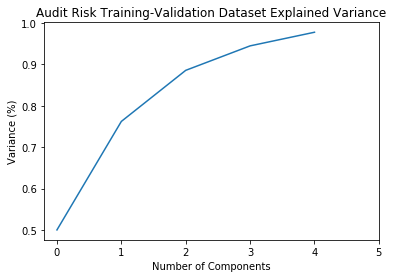

In [23]:
from matplotlib import axes as ax

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks(np.arange(0,6))
plt.ylabel('Variance (%)') #for each component
plt.title('Audit Risk Training-Validation Dataset Explained Variance')
plt.show()

#### Now, applying PCA on test data set using components = 5

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_test = pca.fit_transform(X_test)
print("No. of Components that explain 95 % variance: {}".format(pca.n_components_))
print("PCA explained variance: {}".format(pca.explained_variance_ratio_))

No. of Components that explain 95 % variance: 5
PCA explained variance: [0.50815003 0.26049386 0.11264789 0.07046951 0.03216156]


### Now, applying various regression models after PCA has been performed 

### K Nearest Neigbors Regressor

We will first have to ascertain what should be the ideal value of k, such that we get the most accuracy.
We will determine the mean Mean Squared Error (MSE) of the 5-fold cross-validation scheme for different values of k.
The ideal k would be the one which gives the least mean MSE of the 5-fold cross-validation scheme.

In [220]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_neighbors': range(1, 20)}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [221]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'n_neighbors': 1}
Best Mean Train MSE: 0.0000
Best Mean Train R2: 1.0000
Best Mean Validation MSE: -13.1957
Best Mean Validation R2: 0.8510


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.001195,0.000415,0.000986,0.000014,1,{'n_neighbors': 1},0.877197,0.974253,0.775697,0.882927,...,-13.195748,7.933733,1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.001001,0.000016,0.001392,0.000491,2,{'n_neighbors': 2},0.817241,0.934333,0.769763,0.916341,...,-15.156237,9.107448,2,-3.661801,-4.658309,-3.029825,-4.749989,-3.844592,-3.988903,0.644206
2,0.000793,0.000396,0.001399,0.000495,3,{'n_neighbors': 3},0.766679,0.927527,0.745905,0.914379,...,-17.550814,11.307287,3,-6.121374,-8.014950,-6.420869,-8.047966,-5.910119,-6.903056,0.935584
3,0.000798,0.000399,0.001399,0.000487,4,{'n_neighbors': 4},0.774362,0.895701,0.754043,0.918921,...,-17.618741,10.446558,4,-8.065945,-10.604352,-9.890931,-10.785534,-7.846347,-9.438622,1.248781
4,0.001193,0.000395,0.001397,0.000488,5,{'n_neighbors': 5},0.758406,0.879423,0.774108,0.908206,...,-18.042648,10.529967,5,-10.451773,-13.640662,-11.287293,-13.106454,-10.050227,-11.707282,1.427877
5,0.001397,0.000489,0.002790,0.001153,6,{'n_neighbors': 6},0.728447,0.882858,0.778920,0.896460,...,-18.078182,11.901608,6,-11.306004,-15.572035,-11.978302,-15.588607,-12.556318,-13.400253,1.823490
6,0.000207,0.000414,0.001787,0.000379,7,{'n_neighbors': 7},0.705614,0.902526,0.773288,0.870435,...,-19.193404,12.983462,7,-11.775160,-17.215005,-14.199627,-16.677864,-13.806499,-14.734831,1.991710
7,0.000399,0.000488,0.003539,0.006096,8,{'n_neighbors': 8},0.687482,0.886492,0.763029,0.856420,...,-20.504556,13.568500,10,-12.581819,-17.544316,-15.880750,-16.634834,-14.828925,-15.494128,1.707513
8,0.003124,0.006248,0.000000,0.000000,9,{'n_neighbors': 9},0.686030,0.873087,0.789117,0.858483,...,-20.200885,13.399162,8,-12.923313,-19.259166,-16.982098,-18.815851,-16.084011,-16.812888,2.266487
9,0.000000,0.000000,0.000000,0.000000,10,{'n_neighbors': 10},0.689797,0.856508,0.801106,0.828530,...,-20.415429,12.709808,9,-14.403190,-20.375249,-18.000371,-20.047694,-17.562741,-18.077849,2.141625


We will now confirm the best value of k graphically


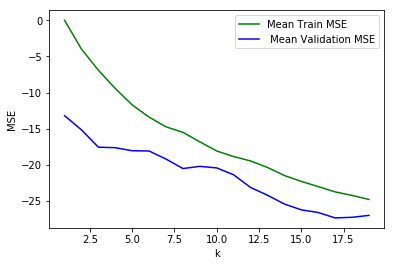

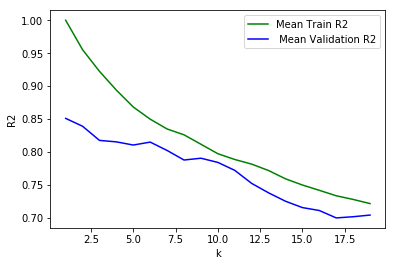

In [222]:
%matplotlib inline

x_axis = range(1,20)
plt.plot(x_axis, grid_search.cv_results_['mean_train_MSE'], c = 'g', label = 'Mean Train MSE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MSE'], c = 'b', label = ' Mean Validation MSE')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

x_axis = range(1,20)
plt.plot(x_axis, grid_search.cv_results_['mean_train_R2'], c = 'g', label = 'Mean Train R2')
plt.plot(x_axis, grid_search.cv_results_['mean_test_R2'], c = 'b', label = ' Mean Validation R2')
plt.legend()
plt.xlabel('k')
plt.ylabel('R2')
plt.show()

##### Thus, we can see that using K Nearest Neighbors regressor, we can get the best MSE and R2 score when k = 1

In [223]:
# Modelling test data on the best knn model with no. of neighbors = 1
model = KNeighborsRegressor(1)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8719
Test MSE: 10.4159


### Linear Regression (Ordinary Least Squares)

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}

lreg = LinearRegression()
lreg.fit(X_trainval, y_reg_trainval)

cv_result = cross_validate(lreg, X_trainval, y_reg_trainval, cv=kfold, scoring=scoring)

print("Mean Train MSE: {:.4f}".format(np.mean(cv_result['train_MSE'])))
print("Mean Train R2: {:.4f}".format(np.mean(cv_result['train_R2'])))

print("Mean Validation MSE: {:.4f}".format(np.mean(cv_result['test_MSE'])))
print("Mean Validation R2: {:.4f}".format(np.mean(cv_result['test_R2'])))

Mean Train MSE: -12.9128
Mean Train R2: 0.8553
Mean Validation MSE: -14.1190
Mean Validation R2: 0.8384


c:\softwares\python\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_MSE'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\softwares\python\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_R2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [225]:
# Modelling test data
model = LinearRegression()
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8758
Test MSE: 10.1034


### Lasso Regression 

In [226]:
from  sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [227]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'alpha': 0.1}
Best Mean Train MSE: -12.9989
Best Mean Train R2: 0.8543
Best Mean Validation MSE: -14.2181
Best Mean Validation R2: 0.8389


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.002586,3.177094e-03,0.000798,0.000399,0.001,{'alpha': 0.001},0.816845,0.862618,0.872514,0.787789,...,-14.119029,6.105047,1,-9.987083,-13.629611,-13.274215,-13.870131,-13.802936,-12.912795,1.477368
1,0.000798,3.988028e-04,0.000399,0.000489,0.01,{'alpha': 0.01},0.816327,0.862695,0.872740,0.788755,...,-14.120394,6.140587,2,-9.988030,-13.630489,-13.275151,-13.870957,-13.803760,-12.913678,1.477330
2,0.000798,3.989699e-04,0.000399,0.000489,0.1,{'alpha': 0.1},0.810647,0.862387,0.873256,0.797208,...,-14.218054,6.500434,3,-10.077889,-13.718211,-13.363151,-13.953624,-13.881643,-12.998904,1.474661
3,0.000997,1.784161e-07,0.000000,0.000000,1,{'alpha': 1},0.699051,0.785808,0.820700,0.796072,...,-20.389284,11.660093,4,-16.531862,-19.738917,-20.045516,-19.865891,-19.449495,-19.126336,1.311702
4,0.000998,2.058700e-06,0.000000,0.000000,10,{'alpha': 10},0.256715,0.389085,0.368808,0.465058,...,-56.268601,27.979748,5,-50.052835,-54.191656,-56.273769,-55.420633,-56.766169,-54.541012,2.408040
5,0.000997,5.135693e-07,0.000598,0.000489,100,{'alpha': 100},-0.009471,-0.017199,-0.005969,-0.042489,...,-89.549629,31.988404,6,-75.418305,-91.512562,-85.875210,-98.849611,-93.769427,-89.085023,8.003323
6,0.000997,2.132481e-07,0.000000,0.000000,1000,{'alpha': 1000},-0.009471,-0.017199,-0.005969,-0.042489,...,-89.549629,31.988404,6,-75.418305,-91.512562,-85.875210,-98.849611,-93.769427,-89.085023,8.003323


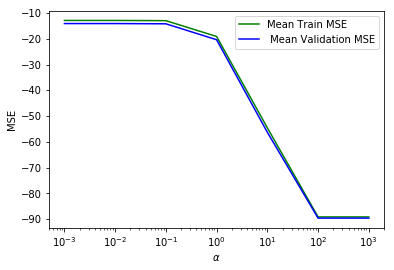

Text(0, 0.5, 'R2')

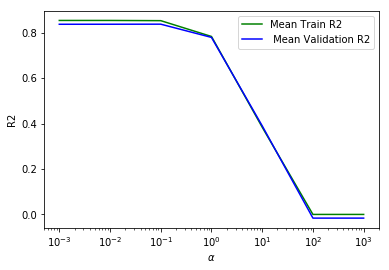

In [228]:
%matplotlib inline

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, grid_search.cv_results_['mean_train_MSE'], c = 'g', label = 'Mean Train MSE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MSE'], c = 'b', label = ' Mean Validation MSE')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.show()

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, grid_search.cv_results_['mean_train_R2'], c = 'g', label = 'Mean Train R2')
plt.plot(x_axis, grid_search.cv_results_['mean_test_R2'], c = 'b', label = ' Mean Validation R2')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('R2')

In [229]:
# Modelling test data with Lasso with the best parameter alpha = 0.1
model = Lasso(alpha=0.1)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8824
Test MSE: 9.5621


### Ridge Regression 

In [230]:
from  sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [231]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'alpha': 10}
Best Mean Train MSE: -13.0391
Best Mean Train R2: 0.8539
Best Mean Validation MSE: -14.2364
Best Mean Validation R2: 0.8393


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.003586,5.188737e-03,0.000597,4.878399e-04,0.001,{'alpha': 0.001},0.816900,0.862608,0.872488,0.787682,...,-14.118979,6.101187,3,-9.987074,-13.629603,-13.274205,-13.870122,-13.802928,-12.912786,1.477368
1,0.000997,4.422006e-07,0.000200,3.999710e-04,0.01,{'alpha': 0.01},0.816893,0.862609,0.872491,0.787697,...,-14.118966,6.101731,2,-9.987074,-13.629603,-13.274206,-13.870122,-13.802928,-12.912786,1.477368
2,0.000997,1.585754e-05,0.000399,4.885192e-04,0.1,{'alpha': 0.1},0.816817,0.862613,0.872522,0.787847,...,-14.118849,6.107173,1,-9.987088,-13.629618,-13.274222,-13.870139,-13.802943,-12.912802,1.477369
3,0.000990,1.486371e-05,0.000000,0.000000e+00,1,{'alpha': 1},0.816053,0.862637,0.872804,0.789306,...,-14.119095,6.161271,4,-9.988462,-13.631115,-13.275818,-13.871738,-13.804398,-12.914306,1.477431
4,0.000997,3.504023e-07,0.000798,3.989459e-04,10,{'alpha': 10},0.808155,0.861442,0.873924,0.800549,...,-14.236399,6.670750,5,-10.101310,-13.755603,-13.407484,-14.005124,-13.925818,-13.039068,1.483183
5,0.000399,4.885192e-04,0.000997,3.504023e-07,100,{'alpha': 100},0.741242,0.817235,0.842227,0.806122,...,-17.846657,9.814481,6,-13.224489,-17.366233,-17.105951,-17.933742,-17.525878,-16.631258,1.724436
6,0.000598,4.886556e-04,0.000997,3.234067e-07,1000,{'alpha': 1000},0.501276,0.596410,0.625983,0.644262,...,-36.258027,18.893986,7,-29.291948,-35.746988,-35.626982,-37.762102,-37.166509,-35.118906,3.026061


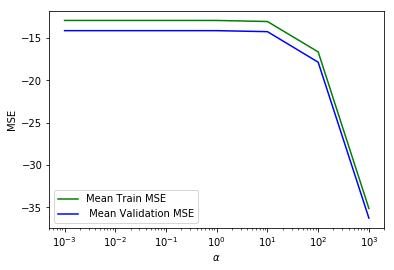

Text(0, 0.5, 'R2')

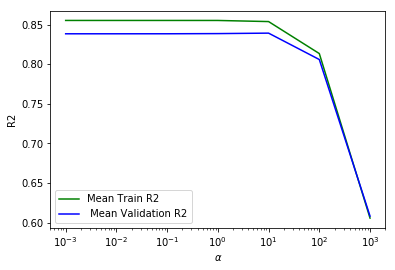

In [232]:
%matplotlib inline

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, grid_search.cv_results_['mean_train_MSE'], c = 'g', label = 'Mean Train MSE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MSE'], c = 'b', label = ' Mean Validation MSE')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.show()

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, grid_search.cv_results_['mean_train_R2'], c = 'g', label = 'Mean Train R2')
plt.plot(x_axis, grid_search.cv_results_['mean_test_R2'], c = 'b', label = ' Mean Validation R2')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('R2')

In [233]:
# Modelling test data with Ridge with the best parameter alpha = 10
model = Ridge(alpha=10)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8832
Test MSE: 9.4961


### Stochastic Gradient Descent Regressor

In [234]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SGDRegressor(random_state= 0, max_iter = 100000, tol=-np.infty,learning_rate = 'optimal'), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_loss', max_iter=100000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [235]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'alpha': 0.01, 'penalty': 'l2'}
Best Mean Train MSE: -12.9339
Best Mean Train R2: 0.8551
Best Mean Validation MSE: -14.1354
Best Mean Validation R2: 0.8392


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_R2,split1_test_R2,split2_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,1.768169,0.060569,0.000000,0.000000,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.816844,0.862570,0.872018,...,-14.139020,6.097167,9,-9.987137,-13.629642,-13.274668,-13.870457,-13.803095,-12.913000,1.477434
1,1.326912,0.049220,0.003331,0.006177,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.816875,0.862571,0.872027,...,-14.137060,6.095975,7,-9.987094,-13.629636,-13.274654,-13.870449,-13.803115,-12.912990,1.477450
2,1.883125,0.034732,0.000000,0.000000,0.0001,elasticnet,"{'alpha': 0.0001, 'penalty': 'elasticnet'}",0.816821,0.862571,0.872027,...,-14.138952,6.098781,8,-9.987132,-13.629637,-13.274657,-13.870450,-13.803089,-12.912993,1.477433
3,1.791758,0.011200,0.000000,0.000000,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",0.816860,0.862623,0.872495,...,-14.119333,6.103870,3,-9.987082,-13.629610,-13.274213,-13.870129,-13.802934,-12.912793,1.477368
4,1.323689,0.026638,0.000000,0.000000,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",0.816592,0.862629,0.872596,...,-14.118944,6.123121,1,-9.987271,-13.629817,-13.274433,-13.870351,-13.803137,-12.913002,1.477377
5,1.872149,0.013428,0.000000,0.000000,0.001,elasticnet,"{'alpha': 0.001, 'penalty': 'elasticnet'}",0.816632,0.862628,0.872581,...,-14.118981,6.120241,2,-9.987225,-13.629765,-13.274379,-13.870295,-13.803086,-12.912950,1.477374
6,1.753800,0.034633,0.000199,0.000397,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.816328,0.862696,0.872739,...,-14.120402,6.140494,4,-9.988028,-13.630486,-13.275149,-13.870955,-13.803758,-12.913675,1.477330
7,1.312448,0.023748,0.000407,0.000499,0.01,l2,"{'alpha': 0.01, 'penalty': 'l2'}",0.813602,0.862520,0.873466,...,-14.135404,6.328081,6,-10.006268,-13.650606,-13.296535,-13.892576,-13.823368,-12.933871,1.478270
8,1.854804,0.032949,0.000200,0.000400,0.01,elasticnet,"{'alpha': 0.01, 'penalty': 'elasticnet'}",0.814012,0.862568,0.873382,...,-14.131374,6.300655,5,-10.002028,-13.645874,-13.291520,-13.887425,-13.818703,-12.929110,1.478015
9,1.850420,0.033543,0.004751,0.006283,0.1,l1,"{'alpha': 0.1, 'penalty': 'l1'}",0.810647,0.862387,0.873256,...,-14.218051,6.500419,10,-10.077885,-13.718200,-13.363156,-13.953620,-13.881640,-12.998900,1.474661


In [236]:
# Modelling test data with SGDRegressor with the best parameter alpha = 0.01 and penalty = l2 
model = SGDRegressor(alpha = 0.01, penalty = 'l2')
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8924
Test MSE: 8.7493


c:\softwares\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Linear Support Vector Regressor

In [237]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'C' : [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LinearSVR(max_iter = 100000), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=100000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [238]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'C': 100}
Best Mean Train MSE: -21.1102
Best Mean Train R2: 0.7632
Best Mean Validation MSE: -22.0680
Best Mean Validation R2: 0.7566


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.001995,0.001544,0.001000,0.000632,0.01,{'C': 0.01},0.230099,0.336903,0.285610,0.377438,...,-62.674102,27.232357,5,-51.148691,-62.683027,-61.269402,-66.635825,-68.426187,-62.032626,6.025490
1,0.001196,0.000399,0.000399,0.000489,0.1,{'C': 0.1},0.634088,0.721929,0.698048,0.683862,...,-27.884740,13.203593,4,-19.867751,-27.065133,-30.817506,-29.224194,-28.137568,-27.022430,3.786427
2,0.004188,0.000399,0.000399,0.000489,1,{'C': 1},0.674339,0.767523,0.813275,0.718271,...,-22.922600,11.946045,3,-17.142632,-22.815992,-22.536962,-23.054031,-24.429940,-21.995911,2.512517
3,0.025152,0.006141,0.000599,0.000489,10,{'C': 10},0.674607,0.778666,0.821282,0.720186,...,-22.162977,12.274853,2,-17.134343,-21.746181,-21.880516,-22.883023,-22.351152,-21.199043,2.071168
4,0.247325,0.029776,0.000392,0.000480,100,{'C': 100},0.676013,0.778985,0.823679,0.720398,...,-22.067996,12.214133,1,-17.036930,-21.676331,-21.598151,-22.880595,-22.359114,-21.110224,2.090178


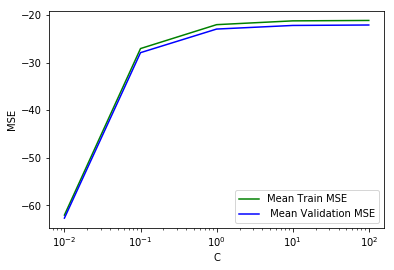

Text(0, 0.5, 'MSE')

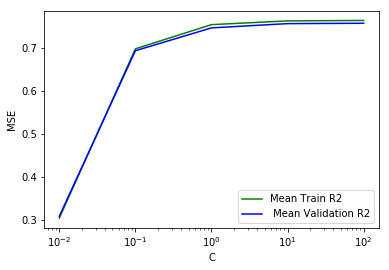

In [239]:
%matplotlib inline

x_axis = [0.01, 0.1, 1, 10, 100]
plt.plot(x_axis, grid_search.cv_results_['mean_train_MSE'], c = 'g', label = 'Mean Train MSE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MSE'], c = 'b', label = ' Mean Validation MSE')
plt.legend()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MSE')
plt.show()

x_axis = [0.01, 0.1, 1, 10, 100]
plt.plot(x_axis, grid_search.cv_results_['mean_train_R2'], c = 'g', label = 'Mean Train R2')
plt.plot(x_axis, grid_search.cv_results_['mean_test_R2'], c = 'b', label = ' Mean Validation R2')
plt.legend()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MSE')

In [240]:
# Modelling test data with Linear Support Vector Regressor with the best parameter C = 1
model = LinearSVR(max_iter = 100000, C=1)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8179
Test MSE: 14.8086


### Kernelized Support Vector Regression

In [241]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'C' : [0.01, 0.1, 1, 10], 
              'gamma' : [0.01, 0.1, 1, 10],
              'kernel' : ['rbf', 'linear']}

grid_search = GridSearchCV(SVR(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [242]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Mean Train MSE: -7.2197
Best Mean Train R2: 0.9190
Best Mean Validation MSE: -11.5687
Best Mean Validation R2: 0.8854


In [243]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_R2,split1_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.005984,1.092798e-03,0.001397,0.000489,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",-0.154942,-0.100931,...,-103.499593,37.069801,32,-88.110753,-107.485017,-99.025255,-115.333007,-107.357471,-103.462301,9.247980
1,0.002194,3.989221e-04,0.000399,0.000489,0.01,0.01,linear,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}",0.416035,0.516659,...,-44.853397,21.501777,18,-35.053818,-44.559088,-44.875585,-48.502344,-48.275256,-44.253218,4.885524
2,0.005585,7.985355e-04,0.001795,0.000746,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",-0.101197,-0.039266,...,-97.167886,36.033368,29,-81.865727,-100.582094,-92.876123,-108.468617,-101.601232,-97.078758,9.072524
3,0.002404,5.039630e-04,0.000599,0.000489,0.01,0.1,linear,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.416035,0.516659,...,-44.853397,21.501777,18,-35.053818,-44.559088,-44.875585,-48.502344,-48.275256,-44.253218,4.885524
4,0.004528,5.789440e-03,0.000599,0.000798,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",-0.104895,-0.043074,...,-97.630327,36.130585,30,-82.329853,-101.088149,-93.402954,-108.893697,-101.845595,-97.512050,9.038736
5,0.000000,0.000000e+00,0.003117,0.006234,0.01,1,linear,"{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}",0.416035,0.516659,...,-44.853397,21.501777,18,-35.053818,-44.559088,-44.875585,-48.502344,-48.275256,-44.253218,4.885524
6,0.005887,7.233051e-03,0.000399,0.000798,0.01,10,rbf,"{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}",-0.108339,-0.047759,...,-98.082822,36.190069,31,-82.766149,-101.603560,-93.870262,-109.354605,-102.218727,-97.962660,9.042437
7,0.001995,9.536743e-08,0.000798,0.000399,0.01,10,linear,"{'C': 0.01, 'gamma': 10, 'kernel': 'linear'}",0.416035,0.516659,...,-44.853397,21.501777,18,-35.053818,-44.559088,-44.875585,-48.502344,-48.275256,-44.253218,4.885524
8,0.004987,2.431402e-07,0.001397,0.000489,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.047352,0.136176,...,-81.123651,32.318439,27,-67.387428,-82.823014,-78.126546,-89.511007,-86.234780,-80.816555,7.701352
9,0.002799,7.579098e-04,0.000791,0.000396,0.1,0.01,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.643589,0.740450,...,-25.557037,13.107084,11,-19.144809,-25.204789,-27.921586,-27.714009,-26.522971,-25.301633,3.227731


In [244]:
# Modelling test data with Support Vector Regressor with the best parameter C = 10, gamma=0.1 and kernel = rbf
model = SVR(C = 10, gamma=0.1, kernel = 'rbf')
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.9006
Test MSE: 8.0819


### Polynomial Regression

In [26]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

train_MSE_list = []
test_MSE_list = []
train_R2_list = []
test_R2_list = []

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}

lreg = LinearRegression()

for degree in range(1,7):
    poly = PolynomialFeatures(degree)
    X_trainval_poly = poly.fit_transform(X_trainval)
    X_test_poly = poly.fit_transform(X_test)
    lreg.fit(X_trainval_poly, y_reg_trainval)
    train_MSE_list.append(mean_squared_error(y_reg_trainval, lreg.predict(X_trainval_poly)))
    test_MSE_list.append(mean_squared_error(y_reg_test, lreg.predict(X_test_poly)))
    train_R2_list.append(r2_score(y_reg_trainval, lreg.predict(X_trainval_poly)))
    test_R2_list.append(r2_score(y_reg_test, lreg.predict(X_test_poly)))

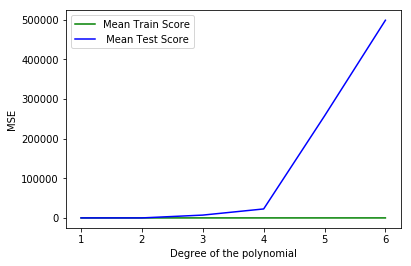

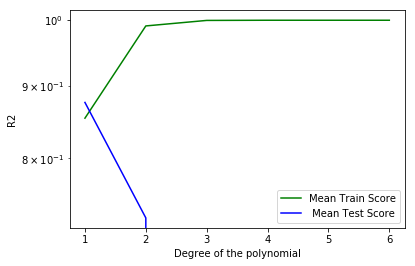

In [27]:
%matplotlib inline

x_axis = range(1,7)
plt.plot(x_axis, train_MSE_list, c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, test_MSE_list, c = 'b', label = ' Mean Test Score')
plt.legend()
plt.xlabel('Degree of the polynomial')
plt.ylabel('MSE')
plt.show()

x_axis = range(1,7)
plt.plot(x_axis, train_R2_list, c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, test_R2_list, c = 'b', label = ' Mean Test Score')
plt.legend()
plt.xlabel('Degree of the polynomial')
plt.ylabel('R2')
plt.yscale('log')

###### It can be clearly seen that we get the best R2 and MSE for both training and test when degree = 1

In [32]:
# Modelling test data with polynomial regression of degree 1
poly = PolynomialFeatures(1)
X_trainval_poly = poly.fit_transform(X_trainval)
X_test_poly = poly.fit_transform(X_test)
lreg.fit(X_trainval_poly, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Validation R2-score: {:.4f}".format(r2_score(y_reg_trainval, lreg.predict(X_trainval_poly))))
print("Validation MSE: {:.4f}".format(mean_squared_error(y_reg_trainval, lreg.predict(X_trainval_poly))))

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, lreg.predict(X_test_poly))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, lreg.predict(X_test_poly))))

Validation R2-score: 0.8538
Validation MSE: 13.0317
Test R2-score: 0.8758
Test MSE: 10.1034


### Comparison of model performance before and after performing Principal Component Analysis (PCA)

<html>
	<body>
		<table margin="1" border="1">
			<tr>
				<th>Model</th>
				<th></th>
				<th>Validation Score (Without PCA)</th>
				<th>Validation Score (With PCA))</th>
				<th>Test Score (Without PCA)</th>
				<th>Test Score (With PCA)</th>
			</tr>
			<tr>
				<td rowspan="2">K Nearest Neigbors Regression</td>
				<td>MSE</td>
				<td>13.7598</td>
				<td>13.1957</td>
				<td>16.3575</td>
				<td>10.4159</td>
			</tr>
			<tr>
				<td>R2-score</td>
				<td>0.8437</td>
				<td>0.851</td>
				<td>0.7989</td>
				<td>0.8719</td>
			</tr>
			<tr>
				<td rowspan="2">Linear Regression (OLS)</td>
				<td>MSE</td>
				<td>11.9186</td>
				<td>14.119</td>
				<td>11.1415</td>
				<td>10.1034</td>
			</tr>
			<tr>
				<td>R2-score</td>
				<td>0.8628</td>
				<td>0.8384</td>
				<td>0.863</td>
				<td>0.8758</td>
			</tr>
			<tr>
				<td rowspan="2">Lasso Regression</td>
				<td>MSE</td>
				<td>11.9311</td>
				<td>14.2181</td>
				<td>10.6311</td>
				<td>9.5621</td>
			</tr>
			<tr>
				<td>R2-score</td>
				<td>0.8651</td>
				<td>0.8389</td>
				<td>0.8693</td>
				<td>0.8824</td>
			</tr>
			<tr>
				<td rowspan="2">Ridge Regression</td>
				<td>MSE</td>
				<td>11.9898</td>
				<td>14.2364</td>
				<td>10.3058</td>
				<td>9.4961</td>
			</tr>
			<tr>
				<td>R2-score</td>
				<td>0.8647</td>
				<td>0.8393</td>
				<td>0.8733</td>
				<td>0.8832</td>
			</tr>
			<tr>
				<td rowspan="2">Stochastic Gradient Descent Regression</td>
				<td>MSE</td>
				<td>11.8559</td>
				<td>14.1354</td>
				<td>9.0544</td>
				<td>8.7493</td>
			</tr>
			<tr>
				<td>R2-score</td>
				<td>0.8648</td>
				<td>0.8392</td>
				<td>0.8887</td>
				<td>0.8924</td>
			</tr>
			<tr>
				<td rowspan="2">Linear Support Vector Regression</td>
				<td>MSE</td>
				<td>20.4785</td>
				<td>22.068</td>
				<td>16.1151</td>
				<td>14.8086</td>
			</tr>
			<tr>
				<td>R2-score</td>
				<td>0.7658</td>
				<td>0.7566</td>
				<td>0.8018</td>
				<td>0.8179</td>
			</tr>
			<tr>
				<td rowspan="2">Kernelized Support Vector Regression (RBF kernel)</td>
				<td>MSE</td>
				<td>12.5945</td>
				<td>11.5687</td>
				<td>6.1079</td>
				<td>8.0819</td>
			</tr>
			<tr>
				<td>R2-score</td>
				<td>0.8785</td>
				<td>0.8854</td>
				<td>0.9249</td>
				<td>0.9006</td>
			</tr>
            <tr>
				<td rowspan="2">Polynomial Regression</td>
				<td>MSE</td>
				<td>2.6859</td>
				<td>13.0317</td>
				<td>0.8192</td>
				<td>10.1034</td>
			</tr>
			<tr>
				<td>R2-score</td>
				<td>0.9512</td>
				<td>0.8538</td>
				<td>0.9899</td>
				<td>0.8758</td>
			</tr>
		</table>
	</body>
</html>

### On comparing the results obtained after PCA with those obtained in Project 1 (Without PCA), we find that the general trend (except a couple of models) is that the best cross-validation score is lesser with PCA compared to without PCA.
### However, the general trend on unseen data (test set) is that the performance improves with PCA compared to without PCA, suggesting that the model fit becomes better.